In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving lending_club_info.csv to lending_club_info.csv


In [3]:
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['cancer_classification.csv']))

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


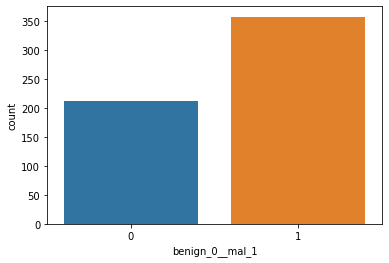

In [ ]:
sns.countplot(x='benign_0__mal_1',data=df)

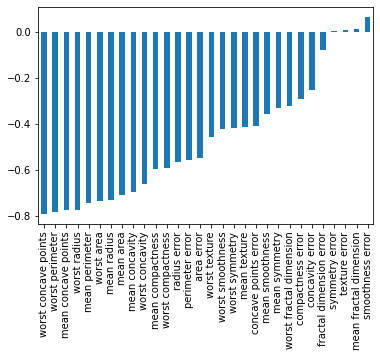

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

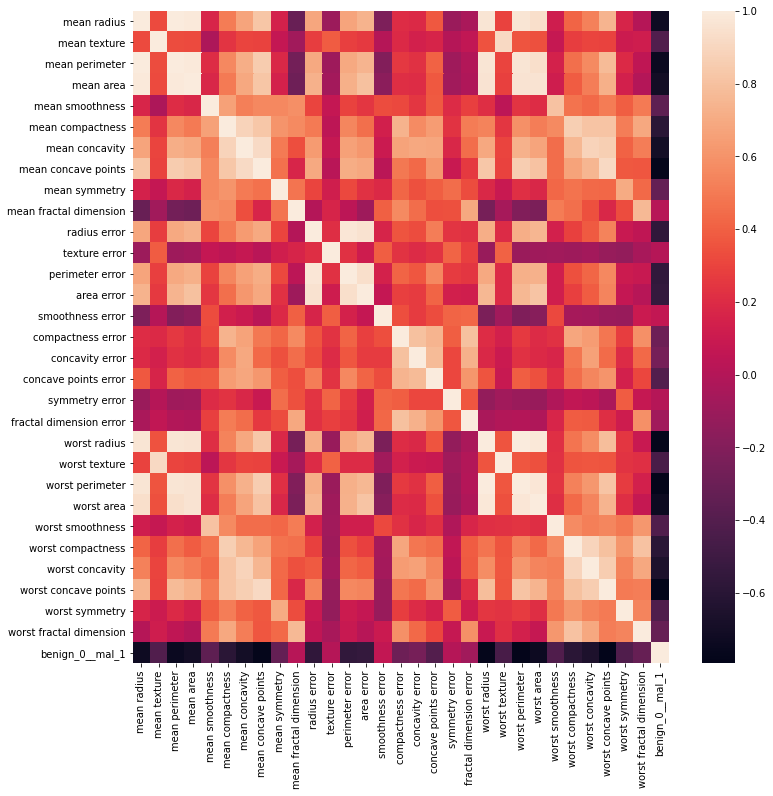

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [ ]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape

(426, 30)

In [ ]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 14ms/step - loss: 0.6832 - val_loss: 0.6624
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6445 - val_loss: 0.6255
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5995 - val_loss: 0.5742
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5508 - val_loss: 0.5233
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4954 - val_loss: 0.4668
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4410 - val_loss: 0.4098
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3897 - val_loss: 0.3580
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3460 - val_loss: 0.3160
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3093 - val_loss: 0.2828
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2789 - val_loss: 0.2527
Epoch 11

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,0.683210,0.662359
1,0.644545,0.625491
2,0.599486,0.574231
3,0.550792,0.523293
4,0.495371,0.466763


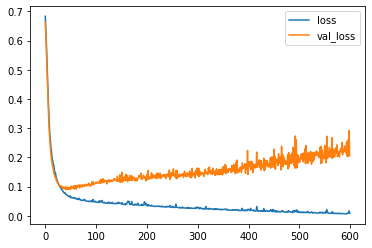

In [ ]:
losses.plot()

In [ ]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6855 - val_loss: 0.6591
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6397 - val_loss: 0.6127
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5900 - val_loss: 0.5619
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5405 - val_loss: 0.5081
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4857 - val_loss: 0.4543
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4333 - val_loss: 0.3985
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3814 - val_loss: 0.3474
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3371 - val_loss: 0.3083
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3019 - val_loss: 0.2749
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.2734 - val_loss: 0.2520
Epoch 11

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,val_loss
0,0.685549,0.659114
1,0.639728,0.612652
2,0.589990,0.561939
3,0.540544,0.508146
4,0.485721,0.454347


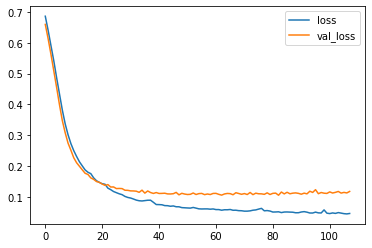

In [ ]:
model_loss.plot()

In [ ]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.7055 - val_loss: 0.6861
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6846 - val_loss: 0.6773
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6761 - val_loss: 0.6672
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6645 - val_loss: 0.6519
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6561 - val_loss: 0.6335
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6413 - val_loss: 0.6148
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6266 - val_loss: 0.5940
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5984 - val_loss: 0.5665
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5753 - val_loss: 0.5326
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5651 - val_loss: 0.5000
Epoch 11

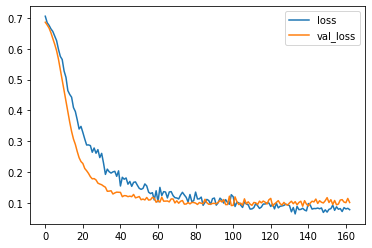

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [ ]:
print(confusion_matrix(y_test,pred))

[[54  1]
 [ 2 86]]
